<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/Deep_Learning_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 8us/step


In [7]:
print(x_train.shape)
print(y_train.shape)
print(type(x_train[0,0]))
print(type(y_train[0]))
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
<class 'numpy.float64'>
<class 'numpy.float64'>
(102, 13)
(102,)


In [11]:
mean_x_train = x_train.mean(axis=0)
std_x_train = x_train.std(axis=0)

x_train = (x_train - mean_x_train) / std_x_train
x_test = (x_test - mean_x_train) / std_x_train

print(mean)
print(mean.shape)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
(13,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid
from keras.optimizers import rmsprop
from keras.losses import mse

model = Sequential()
model.add(Dense(64, activation = relu, input_shape=(13,)))
model.add(Dense(64, activation = relu))
model.add(Dense(1))

opt = rmsprop(lr=0.01, decay=10e-6)
model.compile(optimizer = opt,
              loss = mse,
              metrics = ['mae'])

history = model.fit(x_train, y_train, epochs = 20, batch_size = 16)

Epoch 1/20
404/404 [==============================] - 0s 793us/step - loss: 6225.1840 - mean_absolute_error: 28.0089
Epoch 2/20
404/404 [==============================] - 0s 241us/step - loss: 329.4878 - mean_absolute_error: 13.3712
Epoch 3/20
404/404 [==============================] - 0s 238us/step - loss: 257.4960 - mean_absolute_error: 12.0067
Epoch 4/20
404/404 [==============================] - 0s 240us/step - loss: 115.9080 - mean_absolute_error: 7.9127
Epoch 5/20
404/404 [==============================] - 0s 254us/step - loss: 89.0305 - mean_absolute_error: 6.9777
Epoch 6/20
404/404 [==============================] - 0s 238us/step - loss: 78.3526 - mean_absolute_error: 6.4452
Epoch 7/20
404/404 [==============================] - 0s 237us/step - loss: 85.4583 - mean_absolute_error: 6.4815
Epoch 8/20
404/404 [==============================] - 0s 281us/step - loss: 71.4779 - mean_absolute_error: 5.8724
Epoch 9/20
404/404 [==============================] - 0s 245us/step - loss: 64.5

In [27]:
import numpy as np

def build_model():
  model = Sequential()
  model.add(Dense(64, activation = relu, input_shape=(13,)))
  model.add(Dense(64, activation = relu))
  model.add(Dense(1))

  opt = rmsprop(lr=0.01, decay=10e-6)
  model.compile(optimizer = opt,
                loss = mse,
                metrics = ['mae'])
  return model

k = 4
num_epochs = 100
validation_size = len(x_train) // k
total_scores = []

for i in range (k):
  l_bound = i * validation_size
  h_bound = min((i+1) * validation_size, x_train.shape[0] - 1 )
  x_val = x_train[l_bound : h_bound ]
  x_train_part = np.concatenate([x_train[ : l_bound] , 
                                 x_train[h_bound : ]] , 
                                 axis = 0)
                           
  y_val = y_train[l_bound : h_bound]
  y_train_part = np.concatenate([y_train[ : l_bound ] , 
                                 y_train[h_bound : ]] , 
                                 axis = 0)
  model = build_model()
  model. fit(x_train_part, y_train_part, epochs = num_epochs, batch_size = 1, verbose=0)
  val_mse, val_mae = model.evaluate(x_val, y_val, verbose = 0)
  total_scores.append(val_mae)

print(total_scores)


[2.6131391407239555, 3.9574394981459817, 4.461319215226881, 3.5929386520385744]


In [28]:
print(np.mean(total_scores))

3.6562091265338483


In [50]:
def build_model():
  model = Sequential()
  model.add(Dense(64, activation = relu, input_shape=(13,)))
  model.add(Dense(64, activation = relu))
  model.add(Dense(1))

  opt = rmsprop(lr=0.01, decay=10e-6)
  model.compile(optimizer = opt,
                loss = mse,
                metrics = ['mae'])
  return model

k = 4
num_epochs = 500
validation_size = len(x_train) // k
total_histories = []
mae_history = []
for i in range (k):
  l_bound = i * validation_size
  h_bound = min((i+1) * validation_size, x_train.shape[0] - 1 )
  x_val = x_train[l_bound : h_bound ]
  x_train_part = np.concatenate([x_train[ : l_bound] , 
                                 x_train[h_bound : ]] , 
                                 axis = 0)
                           
  y_val = y_train[l_bound : h_bound]
  y_train_part = np.concatenate([y_train[ : l_bound ] , 
                                 y_train[h_bound : ]] , 
                                 axis = 0)
  model = build_model()
  history = model.fit(x_train_part, y_train_part, validation_data = (x_val, y_val), epochs = num_epochs, batch_size = 1, verbose=0)
  mae_history= history.history['val_mean_absolute_error']
  total_histories.append(mae_history)
print(total_scores)

[2.6131391407239555, 3.9574394981459817, 4.461319215226881, 3.5929386520385744]


In [58]:
print(history.history)
mae_history= history.history['val_loss']

{'val_loss': [103.47700098785339, 149.9949755173549, 119.91356017723098, 72.33588595749578, 61.13987540671718, 92.74088973668157, 66.60665848642587, 73.17234896734156, 72.70862787781167, 73.94403168608464, 51.27377807426965, 53.92837170126764, 57.70022170548793, 87.9480399219878, 54.192914853896944, 52.46331744150201, 54.858765694692266, 55.637711982544424, 54.949514082223175, 56.354125728414836, 48.811827006062956, 43.74030150389765, 72.27433160023764, 45.695015902970916, 37.18355940175766, 39.191861228942436, 41.23430591770011, 39.39881992512281, 43.786846419610086, 33.76954811404285, 38.62030934289564, 36.27044392228127, 33.24602222509864, 32.69509516407503, 50.270033505108806, 44.438582286834716, 41.25385364807822, 35.559084819900455, 33.68911801301409, 42.99755398164852, 29.52348488041316, 39.54101445271168, 36.69891326159239, 32.673750925674106, 30.167336987908346, 50.360587230979725, 38.83440512290923, 35.673464658891355, 34.10506573231658, 32.19573433826212, 27.619226599343964,

In [0]:
#print(total_histories[0])
average_mae_history = [np.mean([ x[i] for x in total_histories ]) for i in range(num_epochs)]


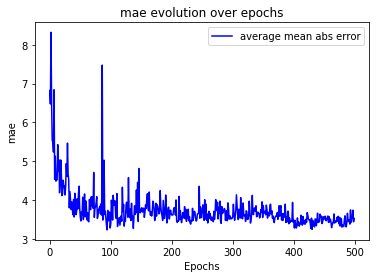

In [60]:
import  matplotlib.pyplot as plt

plt.plot(range(num_epochs),average_mae_history,'b-',label = 'average mean abs error')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.title('mae evolution over epochs')
plt.show()

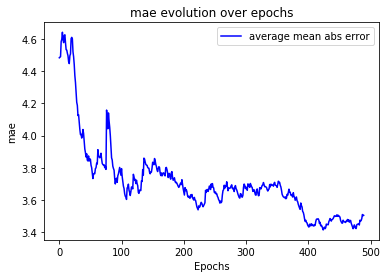

In [61]:
def smooth_curve(points, factor = 0.9):
  smoothed_curve = []
  for point in points:
    if smoothed_curve:
      previous = smoothed_curve[-1]
      smoothed_curve.append(previous * factor + point * (1 - factor))
    else:
      smoothed_curve.append(point)
  return smoothed_curve

average_mae_history_smoothed = smooth_curve(average_mae_history[10:])
n = len(average_mae_history_smoothed)
plt.plot(range(n),average_mae_history_smoothed,
         'b-',label = 'average mean abs error')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.title('mae evolution over epochs')
plt.show()